In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# importing the CSV file into Python environment
raw_data = pd.read_csv(r'D:\education\simplilearn\data science\projects\Project-1 311 NYC call center data analysis\311_Service_Requests_from_2010_to_Present.csv')

In [3]:
# checking the top five observations of the data imported
raw_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-2016 00:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-2016 01:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-2016 04:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-2016 07:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-2016 03:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# checking the type of data
type(raw_data)

pandas.core.frame.DataFrame

### Identifing the shape of the raw dataset

In [5]:
raw_data.shape

(364558, 53)

### Identifing the variables with null values

In [6]:
raw_data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

### Creating a separate DataFrame from the raw_data with required columns as per problem statement
As per the problem statement, required columns are : 

*   Unique Key
*   Created Date
*   Closed Date
*   Complaint Type
*   City
*   Latitude
*   Longitude

Thus, creating a separate data frame with the selected columns:







In [7]:
# Creating a new data frame with above mentioned columns
data = raw_data[['Unique Key','Created Date','Closed Date', 'Complaint Type', 'City', 'Latitude', 'Longitude' ]]

In [8]:
# Checking the top five observations of the new dataframe created:
data.head()

,Unique Key,Created Date,Closed Date,Complaint Type,City,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-2016 00:55,Noise - Street/Sidewalk,NEW YORK,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-2016 01:26,Blocked Driveway,ASTORIA,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-2016 04:51,Blocked Driveway,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-2016 07:43,Illegal Parking,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-2016 03:24,Illegal Parking,ELMHURST,40.733060,-73.874170


### 1.1 Identifying the shape of the data set

In [9]:

data.shape

(364558, 7)

### 1.2 Identifying the variables with Null values

In [10]:
data.isna().sum()

Unique Key           0
Created Date         0
Closed Date       2381
Complaint Type       0
City              2997
Latitude          4030
Longitude         4030
dtype: int64

It shows that in the data selected, Closed Date column, Due date column and city column have Null values in the rows

# Basic data exploratory analysis

In [11]:
# checking the column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unique Key      364558 non-null  int64  
 1   Created Date    364558 non-null  object 
 2   Closed Date     362177 non-null  object 
 3   Complaint Type  364558 non-null  object 
 4   City            361561 non-null  object 
 5   Latitude        360528 non-null  float64
 6   Longitude       360528 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 19.5+ MB


Here, it can be seen that date columns (Created Date & Closed Date) are in object type which is incorrect format.
They are to be in datetime format. Thus, they are to be coverted into correct format.

## Basic data exploratory analysis
 2.1	Analyzing the date column 

In [12]:
#Correcting the datetime to the correct datetime format
data['Created Date'] = pd.to_datetime(data['Created Date'])
data['Closed Date'] = pd.to_datetime(data['Closed Date'])

In [13]:
# checking whether date columns are converted into correct format or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unique Key      364558 non-null  int64         
 1   Created Date    364558 non-null  datetime64[ns]
 2   Closed Date     362177 non-null  datetime64[ns]
 3   Complaint Type  364558 non-null  object        
 4   City            361561 non-null  object        
 5   Latitude        360528 non-null  float64       
 6   Longitude       360528 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 19.5+ MB


It shows that date columns are converted into correct format and all other columns are in correct format

## Basic data exploratory analysis
 2.1 Missing value treatment: Checking missing values in the columns and removing the observations with Null values

In [14]:
#checking for any Null values
data.isna().sum()

Unique Key           0
Created Date         0
Closed Date       2381
Complaint Type       0
City              2997
Latitude          4030
Longitude         4030
dtype: int64

In [15]:
#dropping the observations with Null values in the columns
data = data.dropna(subset = ['Closed Date','City','Latitude','Longitude'])

In [16]:
#checking the new shape of the final cleaned data
data.shape

(360429, 7)

In [17]:
# checking for any Null values
data.isnull().sum()

Unique Key        0
Created Date      0
Closed Date       0
Complaint Type    0
City              0
Latitude          0
Longitude         0
dtype: int64

Here, it is found that all the Null values are removed from the data and dates are also in correct format.
This finally cleaned data can be saved into an excel file using to_excel() command.

## Basic data exploratory analysis
 2.3	Drawing a frequency plot for city-wise complaints

In [18]:
#grouping the data city wise for plotting their complaint_count frequencies

In [19]:
data['City'].value_counts()

BROOKLYN               118632
NEW YORK                76634
BRONX                   49048
STATEN ISLAND           15326
JAMAICA                  8920
ASTORIA                  7974
FLUSHING                 7481
RIDGEWOOD                6388
CORONA                   5382
WOODSIDE                 4354
EAST ELMHURST            3557
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3430
MASPETH                  3116
WOODHAVEN                3102
LONG ISLAND CITY         3019
SOUTH OZONE PARK         2668
FRESH MEADOWS            2449
RICHMOND HILL            2333
MIDDLE VILLAGE           2290
QUEENS VILLAGE           2251
FOREST HILLS             2120
JACKSON HEIGHTS          2105
REGO PARK                1805
BAYSIDE                  1548
COLLEGE POINT            1544
FAR ROCKAWAY             1396
WHITESTONE               1367
HOLLIS                   1231
HOWARD BEACH             1143
SPRINGFIELD GARDENS      1094
ROSEDALE                 1086
SAINT ALBA

From the above output, it is found that there are few city names which are entered twice with upper case and lower case. Their 
names to be corrected as python considers them as different objects as python is case sensitive.

In [20]:
# correcting the names of the cities which are in lower case
data['City'] = data['City'].replace(['Howard Beach','East Elmhurst','Woodside','Long Island City','Astoria'],['HOWARD BEACH','EAST ELMHURST','WOODSIDE','LONG ISLAND CITY','ASTORIA'])

In [21]:
#checking for the change
pd.DataFrame(data['City'].value_counts())

,City
BROOKLYN,118632
NEW YORK,76634
BRONX,49048
STATEN ISLAND,15326
JAMAICA,8920
ASTORIA,8879
FLUSHING,7481
RIDGEWOOD,6388
CORONA,5382
WOODSIDE,4520


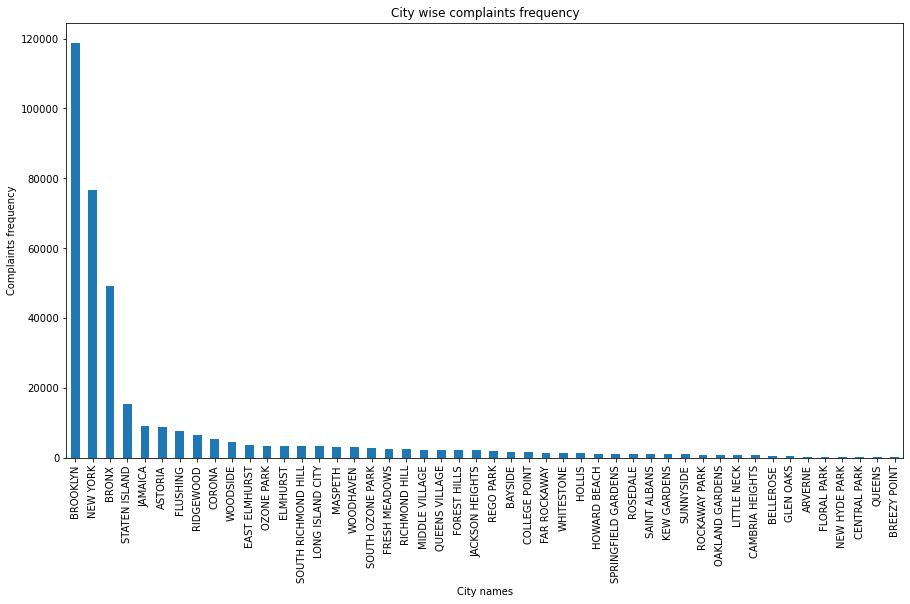

In [22]:
# plotting the bar graph uning pandas library
plt.figure(figsize = (15,8))
data['City'].value_counts().plot(kind = 'bar', title= 'City wise complaints frequency')
plt.ylabel('Complaints frequency')
plt.xlabel('City names')
plt.show()

## Basic data exploratory analysis
    2.4 scatter and hexbin plots for complaint concentration across Brooklyn

In [23]:
brooklyn_data = data[data['City'] == 'BROOKLYN']

In [24]:
brooklyn_data.head()

,Unique Key,Created Date,Closed Date,Complaint Type,City,Latitude,Longitude
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:00,Illegal Parking,BROOKLYN,40.660823,-73.992568
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:00,Blocked Driveway,BROOKLYN,40.623793,-73.999539
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:00,Illegal Parking,BROOKLYN,40.687511,-73.874505
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:00,Noise - Commercial,BROOKLYN,40.679154,-73.983430
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:00,Noise - Commercial,BROOKLYN,40.616550,-73.930202


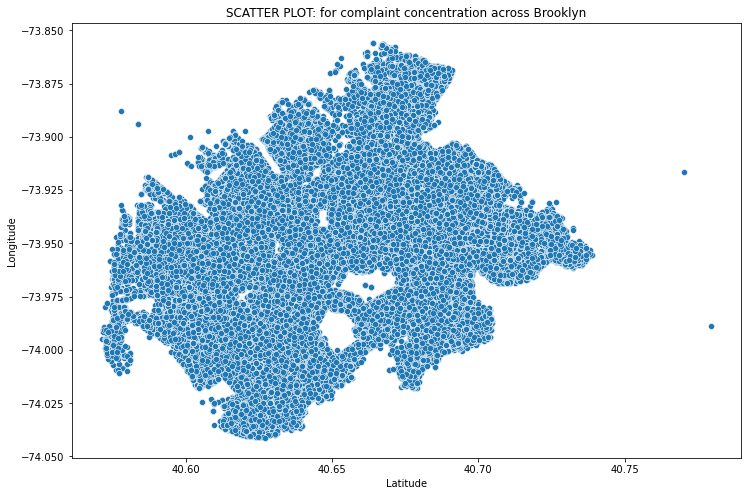

In [25]:
x = brooklyn_data['Latitude']
y = brooklyn_data['Longitude']
plt.figure(figsize = (12,8))
sns.scatterplot(x,y)
plt.title('SCATTER PLOT: for complaint concentration across Brooklyn')
plt.show()

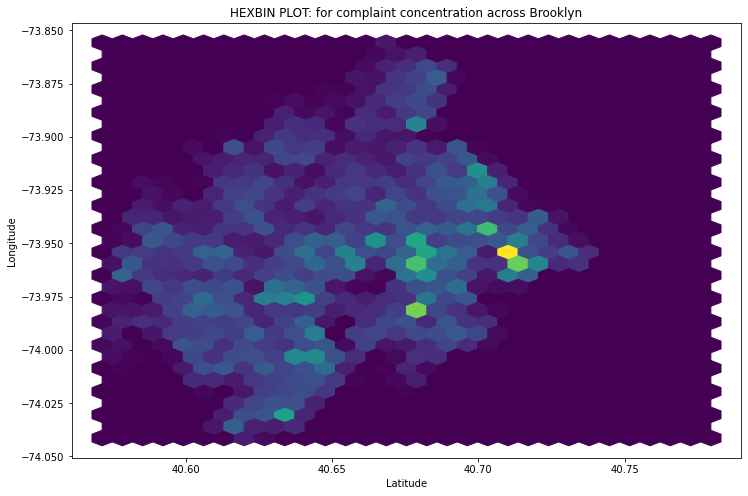

In [26]:
plt.figure(figsize = (12,8))
plt.hexbin(x,y, gridsize=30)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('HEXBIN PLOT: for complaint concentration across Brooklyn')
plt.show()

## Finding major type of complaints
  3.1 Plotting a bar graph of count vs. complaint types

In [27]:
print(data['Complaint Type'].value_counts())

Blocked Driveway             100492
Illegal Parking               91092
Noise - Street/Sidewalk       50800
Noise - Commercial            43629
Derelict Vehicle              21427
Noise - Vehicle               19125
Animal Abuse                  10503
Traffic                        5167
Homeless Encampment            4829
Vending                        4164
Noise - Park                   3995
Drinking                       1400
Noise - House of Worship       1061
Posting Advertisement           679
Urinating in Public             641
Bike/Roller/Skate Chronic       463
Panhandling                     320
Disorderly Youth                314
Illegal Fireworks               167
Graffiti                        157
Squeegee                          4
Name: Complaint Type, dtype: int64


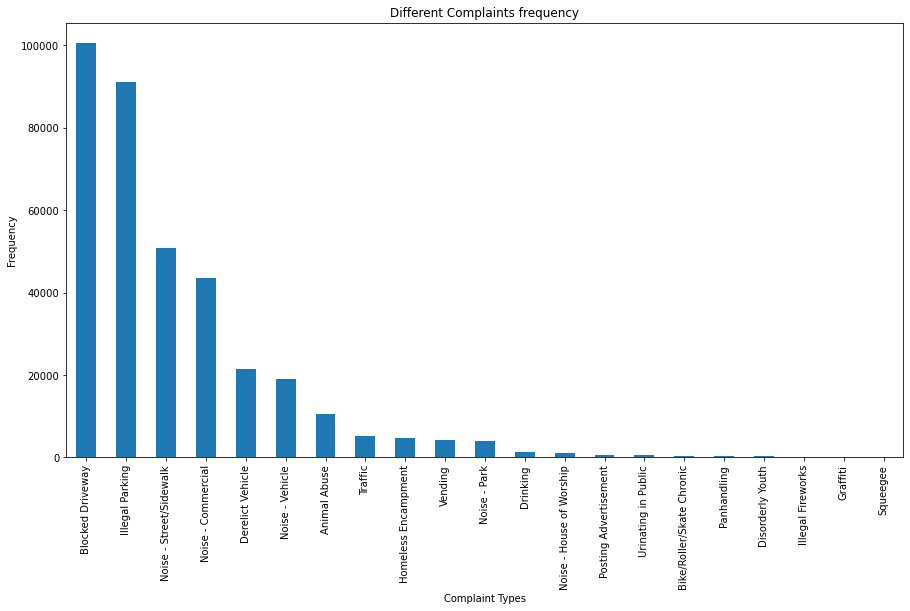

In [28]:
# plotting graph for count Vs complaint types
plt.figure(figsize = (15,8))
data['Complaint Type'].value_counts().plot(kind = 'bar', title = 'Different Complaints frequency')
plt.xlabel('Complaint Types')
plt.ylabel('Frequency')
plt.show()

## Finding major type of complaints
  3.2 Top 10 types of complaints

In [29]:
#top 10 types of complaints
major_complaint_types = pd.DataFrame(data['Complaint Type'].value_counts().head(10))
major_complaint_types

,Complaint Type
Blocked Driveway,100492
Illegal Parking,91092
Noise - Street/Sidewalk,50800
Noise - Commercial,43629
Derelict Vehicle,21427
Noise - Vehicle,19125
Animal Abuse,10503
Traffic,5167
Homeless Encampment,4829
Vending,4164


### Displaying type of complaints in each city in a separate data set and Visualizing the major type of complaints in each city

In [30]:
# Creating a list of City names
city_list = data['City'].unique()

In [31]:
print(city_list)

['NEW YORK' 'ASTORIA' 'BRONX' 'ELMHURST' 'BROOKLYN' 'KEW GARDENS'
 'JACKSON HEIGHTS' 'MIDDLE VILLAGE' 'REGO PARK' 'SAINT ALBANS' 'JAMAICA'
 'SOUTH RICHMOND HILL' 'RIDGEWOOD' 'HOWARD BEACH' 'FOREST HILLS'
 'STATEN ISLAND' 'OZONE PARK' 'RICHMOND HILL' 'WOODHAVEN' 'FLUSHING'
 'CORONA' 'QUEENS VILLAGE' 'OAKLAND GARDENS' 'HOLLIS' 'MASPETH'
 'EAST ELMHURST' 'SOUTH OZONE PARK' 'WOODSIDE' 'FRESH MEADOWS'
 'LONG ISLAND CITY' 'ROCKAWAY PARK' 'SPRINGFIELD GARDENS' 'COLLEGE POINT'
 'BAYSIDE' 'GLEN OAKS' 'FAR ROCKAWAY' 'BELLEROSE' 'LITTLE NECK'
 'CAMBRIA HEIGHTS' 'ROSEDALE' 'SUNNYSIDE' 'WHITESTONE' 'ARVERNE'
 'FLORAL PARK' 'NEW HYDE PARK' 'CENTRAL PARK' 'BREEZY POINT' 'QUEENS']


In [32]:
# Crating a dict to store each city data in separate data set with city as key and its data as elements
city_data = {}

Type of complaints and their count in the city: NEW YORK
Noise - Street/Sidewalk      22081
Noise - Commercial           18668
Illegal Parking              14368
Noise - Vehicle               6179
Homeless Encampment           3021
Blocked Driveway              2687
Vending                       2620
Animal Abuse                  1926
Traffic                       1751
Noise - Park                  1200
Derelict Vehicle               688
Drinking                       320
Urinating in Public            264
Bike/Roller/Skate Chronic      249
Noise - House of Worship       217
Panhandling                    203
Disorderly Youth                80
Posting Advertisement           49
Illegal Fireworks               34
Graffiti                        25
Squeegee                         4
Name: Complaint Type, dtype: int64


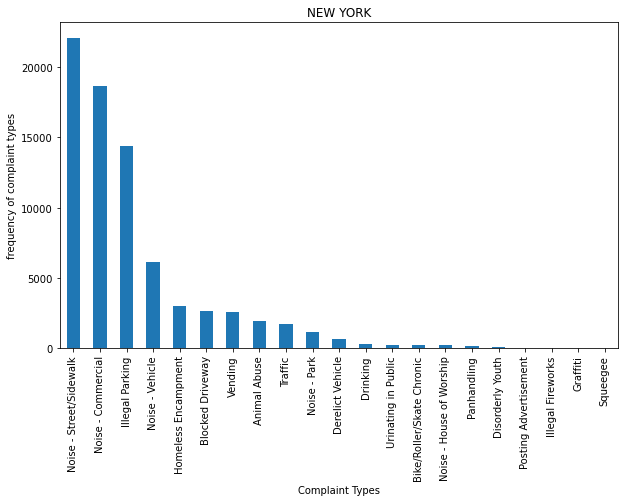



Type of complaints and their count in the city: ASTORIA
Blocked Driveway             3595
Noise - Commercial           1950
Illegal Parking              1614
Noise - Street/Sidewalk       553
Derelict Vehicle              440
Noise - Vehicle               236
Animal Abuse                  170
Noise - Park                   64
Traffic                        60
Vending                        57
Drinking                       43
Homeless Encampment            32
Noise - House of Worship       21
Bike/Roller/Skate Chronic      16
Urinating in Public            10
Disorderly Youth                5
Illegal Fireworks               4
Graffiti                        4
Posting Advertisement           3
Panhandling                     2
Name: Complaint Type, dtype: int64


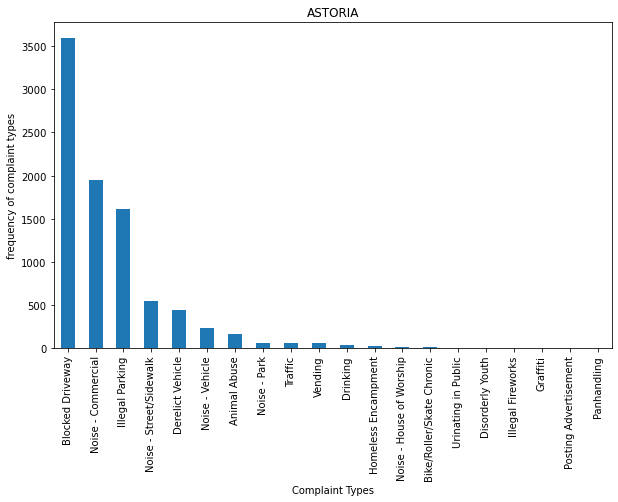



Type of complaints and their count in the city: BRONX
Blocked Driveway             17052
Illegal Parking               9857
Noise - Street/Sidewalk       9118
Noise - Vehicle               3545
Noise - Commercial            2941
Derelict Vehicle              2399
Animal Abuse                  1967
Noise - Park                   523
Vending                        431
Traffic                        426
Homeless Encampment            274
Drinking                       206
Noise - House of Worship        90
Disorderly Youth                66
Urinating in Public             54
Illegal Fireworks               24
Bike/Roller/Skate Chronic       22
Panhandling                     20
Posting Advertisement           18
Graffiti                        15
Name: Complaint Type, dtype: int64


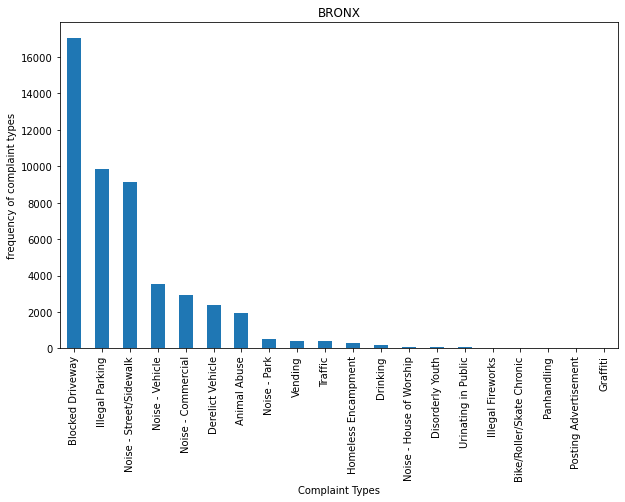



Type of complaints and their count in the city: ELMHURST
Blocked Driveway             1992
Illegal Parking               760
Noise - Street/Sidewalk       228
Derelict Vehicle               94
Noise - Commercial             85
Noise - Vehicle                69
Animal Abuse                   59
Noise - Park                   35
Homeless Encampment            34
Vending                        25
Traffic                        18
Drinking                       13
Urinating in Public            10
Noise - House of Worship        6
Panhandling                     3
Bike/Roller/Skate Chronic       2
Disorderly Youth                2
Illegal Fireworks               1
Posting Advertisement           1
Graffiti                        1
Name: Complaint Type, dtype: int64


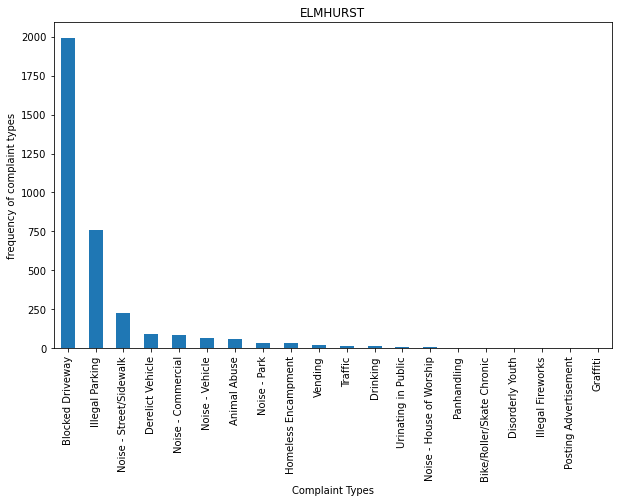



Type of complaints and their count in the city: BROOKLYN
Blocked Driveway             36431
Illegal Parking              33461
Noise - Street/Sidewalk      13944
Noise - Commercial           13848
Derelict Vehicle              6245
Noise - Vehicle               5933
Animal Abuse                  3186
Noise - Park                  1558
Traffic                       1253
Homeless Encampment            939
Vending                        575
Noise - House of Worship       387
Drinking                       291
Urinating in Public            155
Bike/Roller/Skate Chronic      121
Disorderly Youth                79
Graffiti                        60
Illegal Fireworks               60
Posting Advertisement           58
Panhandling                     48
Name: Complaint Type, dtype: int64


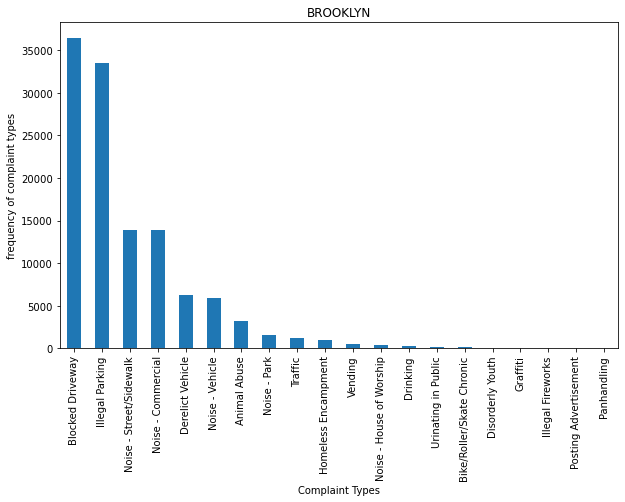



Type of complaints and their count in the city: KEW GARDENS
Blocked Driveway            429
Illegal Parking             276
Noise - Commercial          203
Animal Abuse                 26
Noise - Vehicle              23
Derelict Vehicle             16
Noise - Street/Sidewalk      13
Traffic                      10
Homeless Encampment           5
Urinating in Public           3
Drinking                      1
Vending                       1
Noise - House of Worship      1
Posting Advertisement         1
Name: Complaint Type, dtype: int64


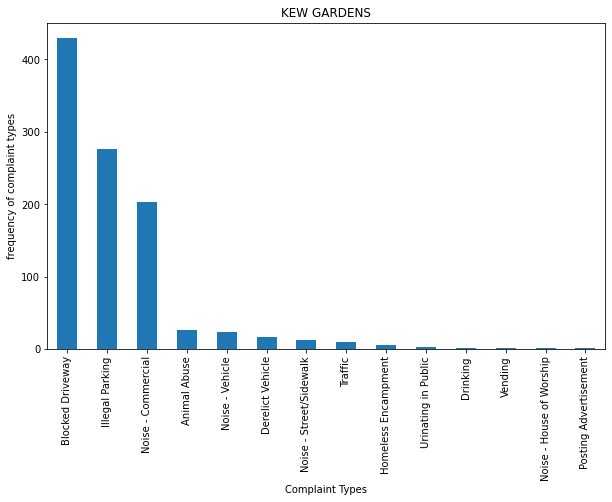



Type of complaints and their count in the city: JACKSON HEIGHTS
Blocked Driveway             703
Noise - Commercial           619
Illegal Parking              240
Noise - Street/Sidewalk      238
Vending                       86
Noise - Vehicle               75
Animal Abuse                  50
Derelict Vehicle              41
Traffic                       13
Homeless Encampment           11
Drinking                      10
Noise - Park                   8
Urinating in Public            3
Noise - House of Worship       2
Bike/Roller/Skate Chronic      2
Illegal Fireworks              1
Panhandling                    1
Posting Advertisement          1
Graffiti                       1
Name: Complaint Type, dtype: int64


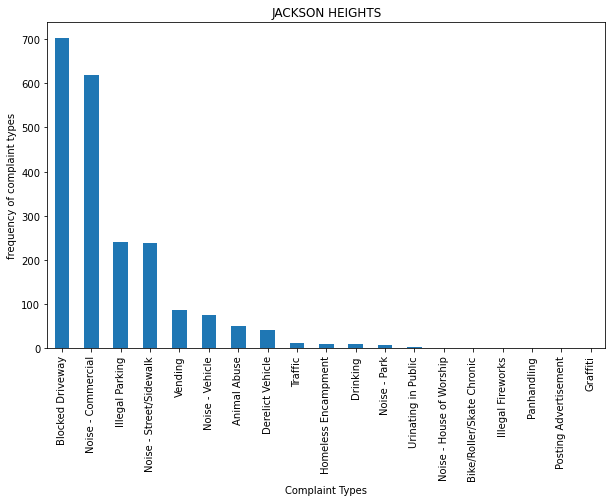



Type of complaints and their count in the city: MIDDLE VILLAGE
Illegal Parking              1104
Blocked Driveway              663
Derelict Vehicle              366
Noise - Vehicle                45
Noise - Street/Sidewalk        38
Animal Abuse                   35
Traffic                        14
Noise - Commercial             13
Homeless Encampment             5
Noise - Park                    4
Drinking                        2
Bike/Roller/Skate Chronic       1
Name: Complaint Type, dtype: int64


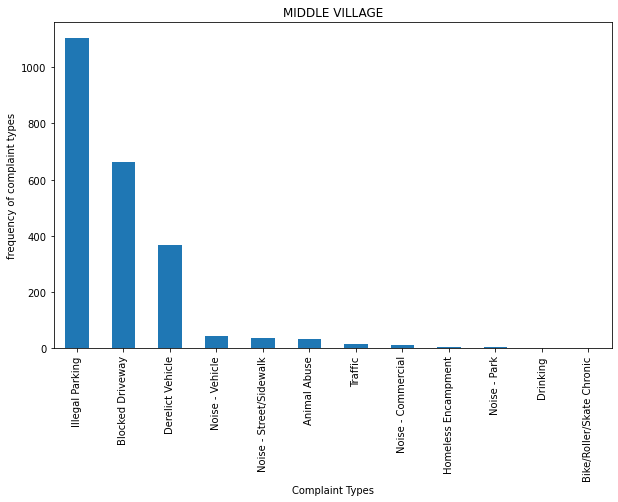



Type of complaints and their count in the city: REGO PARK
Blocked Driveway            780
Illegal Parking             639
Derelict Vehicle             93
Noise - Commercial           82
Noise - Street/Sidewalk      64
Noise - Vehicle              60
Animal Abuse                 33
Noise - Park                 22
Traffic                      16
Homeless Encampment           6
Drinking                      4
Vending                       3
Graffiti                      1
Noise - House of Worship      1
Urinating in Public           1
Name: Complaint Type, dtype: int64


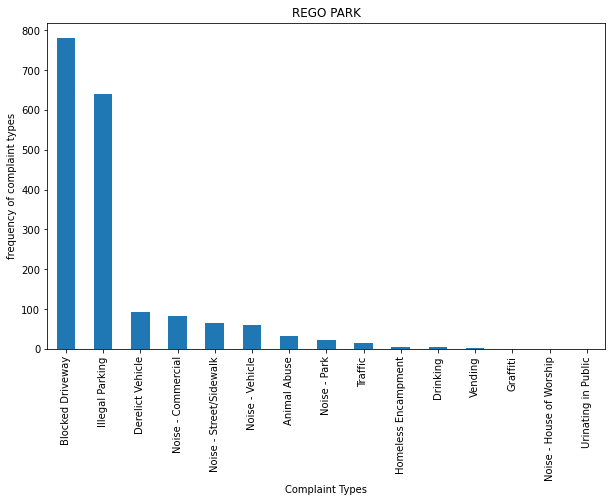



Type of complaints and their count in the city: SAINT ALBANS
Blocked Driveway            318
Derelict Vehicle            248
Illegal Parking             237
Noise - Street/Sidewalk      81
Noise - Vehicle              50
Animal Abuse                 43
Noise - Commercial           36
Traffic                      14
Homeless Encampment          11
Drinking                      3
Vending                       2
Disorderly Youth              1
Noise - Park                  1
Urinating in Public           1
Noise - House of Worship      1
Name: Complaint Type, dtype: int64


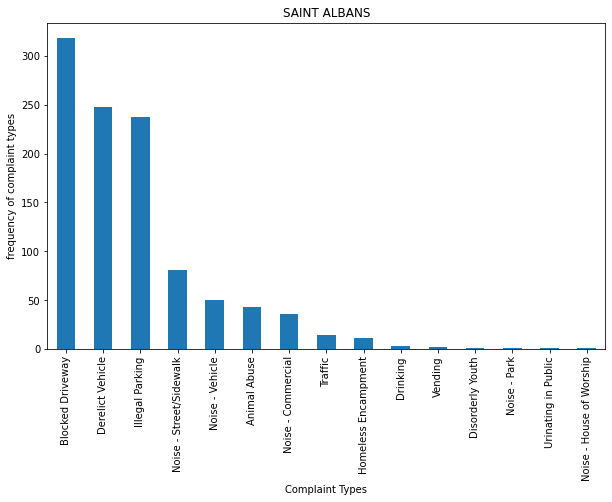



Type of complaints and their count in the city: JAMAICA
Blocked Driveway             3619
Illegal Parking              1696
Derelict Vehicle             1132
Traffic                       632
Noise - Commercial            552
Noise - Street/Sidewalk       359
Noise - Vehicle               336
Animal Abuse                  317
Homeless Encampment            93
Drinking                       40
Noise - Park                   38
Urinating in Public            37
Vending                        24
Noise - House of Worship       15
Disorderly Youth                9
Posting Advertisement           8
Illegal Fireworks               4
Bike/Roller/Skate Chronic       3
Panhandling                     3
Graffiti                        3
Name: Complaint Type, dtype: int64


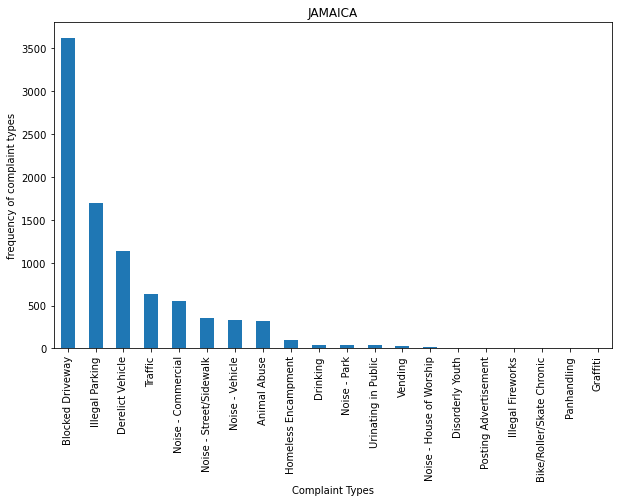



Type of complaints and their count in the city: SOUTH RICHMOND HILL
Blocked Driveway             1945
Illegal Parking               596
Derelict Vehicle              356
Noise - Commercial            223
Noise - Street/Sidewalk        93
Noise - Vehicle                93
Animal Abuse                   40
Drinking                       25
Vending                        24
Homeless Encampment            12
Traffic                        12
Noise - House of Worship        3
Disorderly Youth                2
Illegal Fireworks               2
Noise - Park                    2
Bike/Roller/Skate Chronic       1
Urinating in Public             1
Name: Complaint Type, dtype: int64


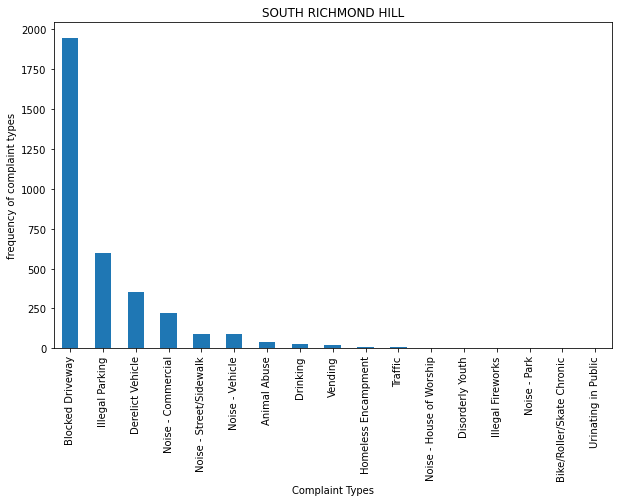



Type of complaints and their count in the city: RIDGEWOOD
Illegal Parking              2234
Blocked Driveway             2160
Derelict Vehicle              507
Noise - Commercial            491
Noise - Street/Sidewalk       448
Noise - Vehicle               249
Animal Abuse                  154
Traffic                        49
Noise - Park                   28
Homeless Encampment            26
Drinking                       10
Vending                         9
Urinating in Public             9
Bike/Roller/Skate Chronic       3
Graffiti                        3
Disorderly Youth                3
Illegal Fireworks               2
Noise - House of Worship        2
Posting Advertisement           1
Name: Complaint Type, dtype: int64


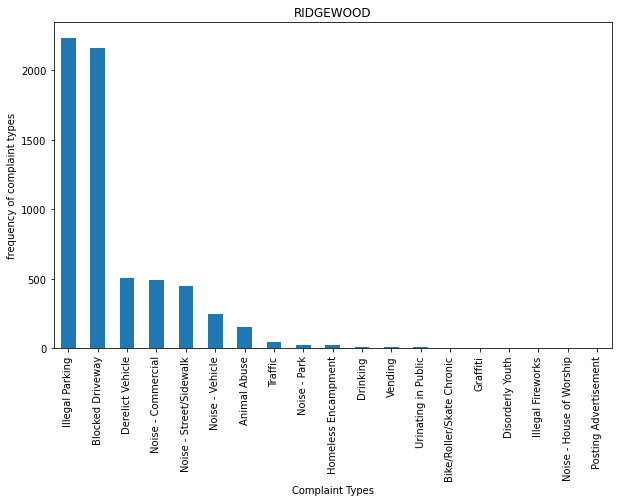



Type of complaints and their count in the city: HOWARD BEACH
Illegal Parking              384
Noise - Commercial           258
Blocked Driveway             216
Derelict Vehicle             172
Animal Abuse                  50
Noise - Street/Sidewalk       22
Noise - Vehicle               10
Traffic                        9
Vending                        5
Illegal Fireworks              4
Drinking                       4
Homeless Encampment            3
Noise - Park                   2
Panhandling                    2
Disorderly Youth               1
Noise - House of Worship       1
Bike/Roller/Skate Chronic      1
Name: Complaint Type, dtype: int64


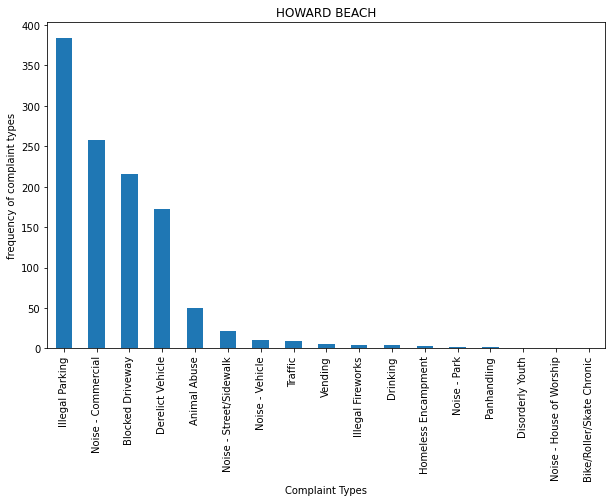



Type of complaints and their count in the city: FOREST HILLS
Blocked Driveway             873
Illegal Parking              626
Noise - Commercial           163
Noise - Street/Sidewalk      102
Animal Abuse                  78
Derelict Vehicle              71
Noise - Vehicle               69
Traffic                       65
Noise - Park                  20
Homeless Encampment           18
Vending                       10
Bike/Roller/Skate Chronic      6
Panhandling                    6
Posting Advertisement          4
Graffiti                       3
Urinating in Public            2
Disorderly Youth               1
Drinking                       1
Illegal Fireworks              1
Noise - House of Worship       1
Name: Complaint Type, dtype: int64


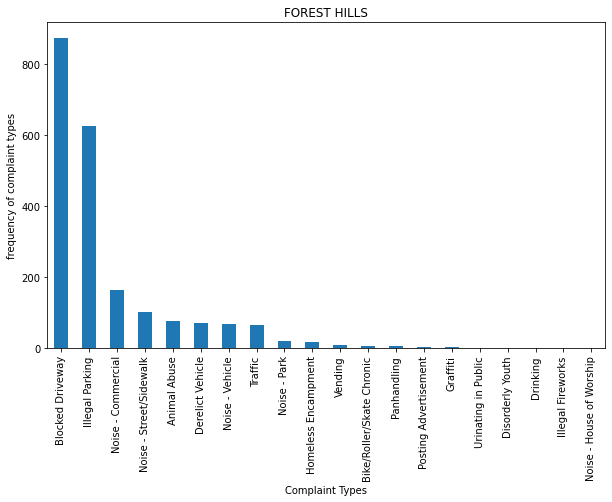



Type of complaints and their count in the city: STATEN ISLAND
Illegal Parking              6222
Blocked Driveway             2844
Derelict Vehicle             2182
Noise - Street/Sidewalk       884
Animal Abuse                  786
Noise - Commercial            783
Posting Advertisement         516
Noise - Vehicle               423
Traffic                       228
Drinking                      188
Homeless Encampment            77
Noise - Park                   67
Disorderly Youth               25
Vending                        25
Urinating in Public            19
Noise - House of Worship       18
Panhandling                    13
Illegal Fireworks              11
Bike/Roller/Skate Chronic       9
Graffiti                        6
Name: Complaint Type, dtype: int64


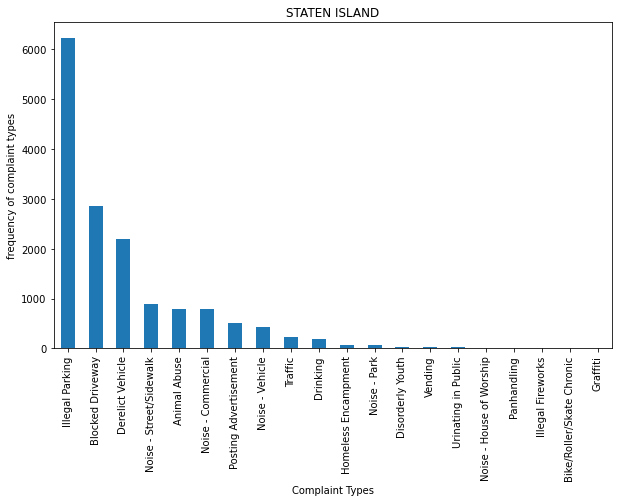



Type of complaints and their count in the city: OZONE PARK
Blocked Driveway             1681
Illegal Parking               774
Derelict Vehicle              479
Noise - Street/Sidewalk       140
Noise - Commercial            125
Noise - Vehicle                81
Animal Abuse                   72
Traffic                        21
Noise - Park                   20
Drinking                       20
Homeless Encampment             8
Panhandling                     7
Urinating in Public             4
Disorderly Youth                4
Noise - House of Worship        4
Posting Advertisement           3
Bike/Roller/Skate Chronic       1
Illegal Fireworks               1
Vending                         1
Name: Complaint Type, dtype: int64


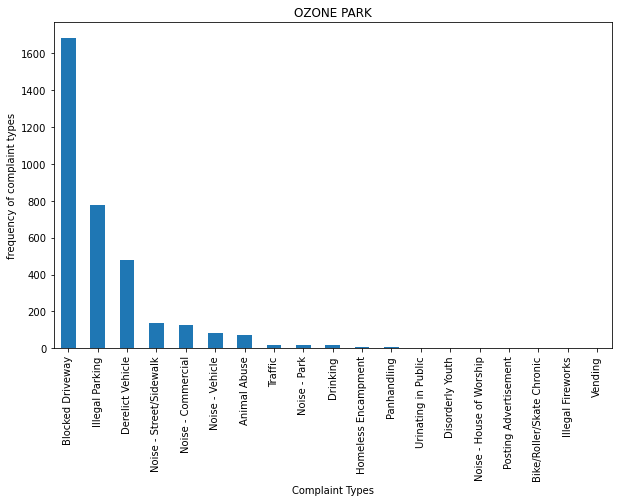



Type of complaints and their count in the city: RICHMOND HILL
Blocked Driveway           1099
Illegal Parking             489
Noise - Commercial          249
Derelict Vehicle            200
Noise - Street/Sidewalk      93
Noise - Vehicle              69
Animal Abuse                 55
Homeless Encampment          30
Vending                      15
Drinking                     10
Traffic                       8
Urinating in Public           5
Noise - Park                  4
Illegal Fireworks             4
Posting Advertisement         2
Graffiti                      1
Name: Complaint Type, dtype: int64


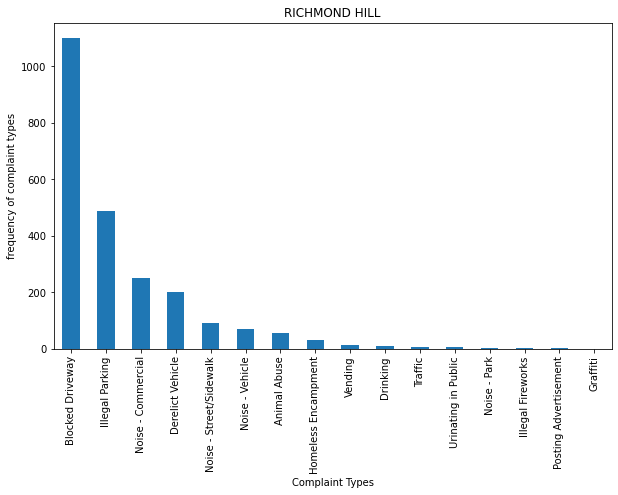



Type of complaints and their count in the city: WOODHAVEN
Blocked Driveway             1363
Illegal Parking               896
Derelict Vehicle              369
Noise - Commercial            209
Noise - Street/Sidewalk        89
Noise - Vehicle                81
Animal Abuse                   57
Homeless Encampment            10
Traffic                         7
Vending                         6
Drinking                        4
Noise - House of Worship        3
Noise - Park                    3
Urinating in Public             2
Bike/Roller/Skate Chronic       2
Panhandling                     1
Name: Complaint Type, dtype: int64


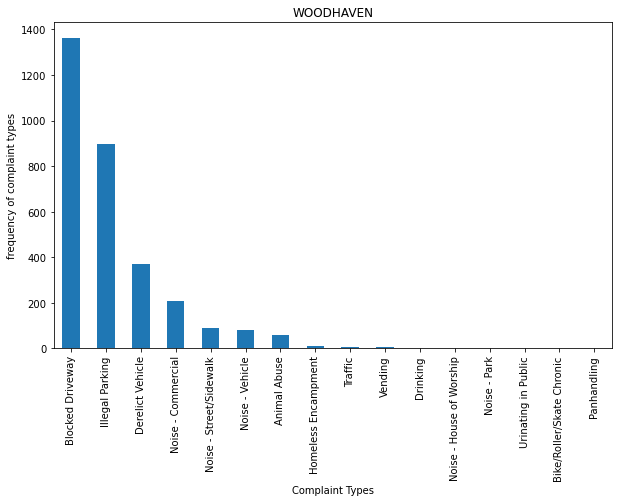



Type of complaints and their count in the city: FLUSHING
Blocked Driveway             3640
Illegal Parking              2248
Derelict Vehicle              531
Noise - Street/Sidewalk       241
Noise - Commercial            220
Animal Abuse                  191
Noise - Vehicle               147
Noise - Park                   61
Traffic                        59
Drinking                       47
Vending                        37
Homeless Encampment            26
Urinating in Public            12
Graffiti                        6
Noise - House of Worship        5
Bike/Roller/Skate Chronic       3
Illegal Fireworks               2
Panhandling                     2
Disorderly Youth                2
Posting Advertisement           1
Name: Complaint Type, dtype: int64


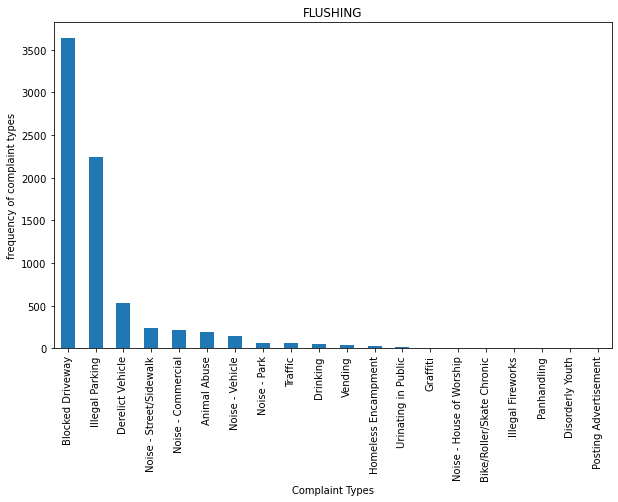



Type of complaints and their count in the city: CORONA
Blocked Driveway            3597
Illegal Parking              791
Noise - Commercial           281
Noise - Street/Sidewalk      242
Noise - Vehicle              110
Animal Abuse                 104
Derelict Vehicle              72
Vending                       65
Drinking                      34
Homeless Encampment           26
Noise - Park                  24
Traffic                       14
Urinating in Public            7
Disorderly Youth               6
Graffiti                       4
Noise - House of Worship       3
Posting Advertisement          1
Panhandling                    1
Name: Complaint Type, dtype: int64


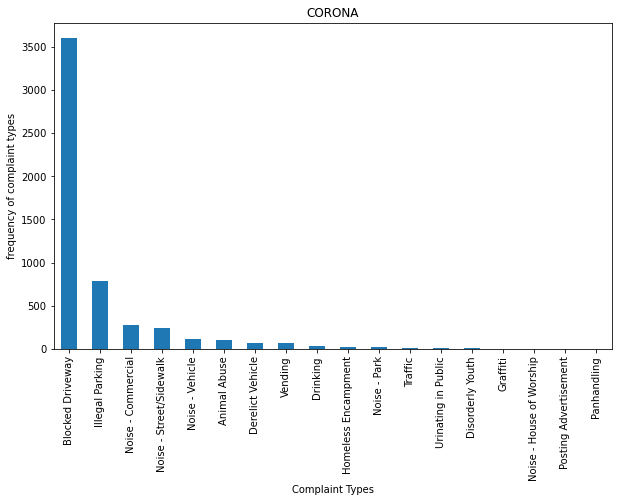



Type of complaints and their count in the city: QUEENS VILLAGE
Blocked Driveway            772
Illegal Parking             669
Derelict Vehicle            478
Animal Abuse                 90
Noise - Street/Sidewalk      69
Noise - Vehicle              54
Noise - Commercial           49
Traffic                      27
Homeless Encampment          19
Urinating in Public           5
Drinking                      5
Illegal Fireworks             5
Vending                       2
Noise - House of Worship      2
Noise - Park                  2
Panhandling                   1
Graffiti                      1
Posting Advertisement         1
Name: Complaint Type, dtype: int64


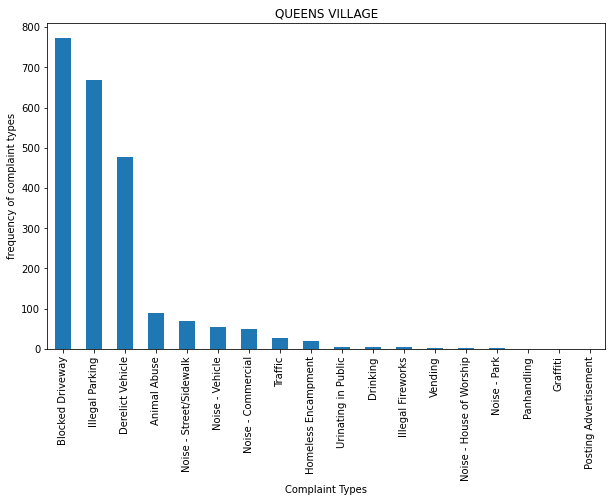



Type of complaints and their count in the city: OAKLAND GARDENS
Illegal Parking              335
Blocked Driveway             177
Derelict Vehicle             117
Animal Abuse                  29
Noise - Street/Sidewalk       20
Noise - Park                  14
Noise - Vehicle                7
Traffic                        6
Vending                        2
Drinking                       2
Bike/Roller/Skate Chronic      2
Noise - Commercial             2
Homeless Encampment            1
Disorderly Youth               1
Name: Complaint Type, dtype: int64


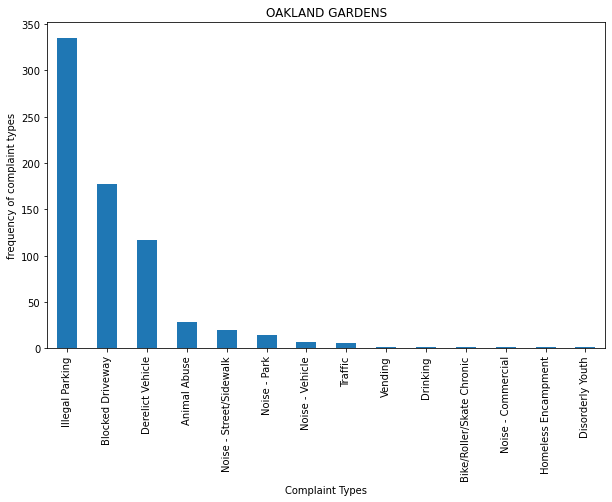



Type of complaints and their count in the city: HOLLIS
Blocked Driveway            442
Noise - House of Worship    215
Illegal Parking             181
Derelict Vehicle            162
Noise - Commercial           54
Noise - Vehicle              52
Noise - Street/Sidewalk      43
Animal Abuse                 39
Noise - Park                 17
Traffic                      11
Homeless Encampment           9
Drinking                      3
Urinating in Public           2
Disorderly Youth              1
Name: Complaint Type, dtype: int64


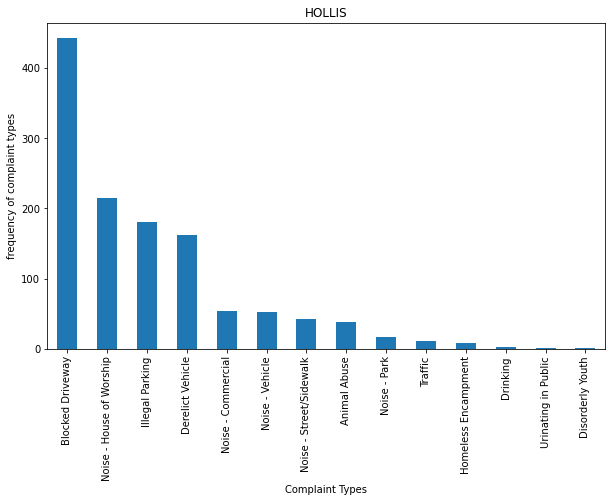



Type of complaints and their count in the city: MASPETH
Illegal Parking              1233
Blocked Driveway             1000
Derelict Vehicle              510
Noise - Street/Sidewalk       124
Traffic                        71
Noise - Commercial             57
Animal Abuse                   56
Noise - Vehicle                26
Homeless Encampment            11
Drinking                        9
Vending                         7
Noise - Park                    3
Urinating in Public             2
Disorderly Youth                2
Noise - House of Worship        2
Bike/Roller/Skate Chronic       1
Illegal Fireworks               1
Graffiti                        1
Name: Complaint Type, dtype: int64


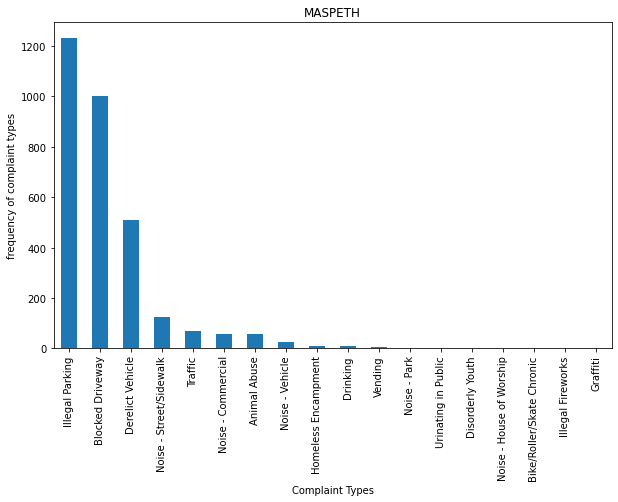



Type of complaints and their count in the city: EAST ELMHURST
Blocked Driveway             1925
Illegal Parking              1120
Derelict Vehicle              138
Noise - Street/Sidewalk       110
Animal Abuse                   85
Noise - Vehicle                82
Noise - Commercial             41
Noise - House of Worship       25
Traffic                        24
Drinking                        9
Vending                         9
Urinating in Public             6
Noise - Park                    5
Graffiti                        3
Homeless Encampment             2
Posting Advertisement           1
Disorderly Youth                1
Bike/Roller/Skate Chronic       1
Name: Complaint Type, dtype: int64


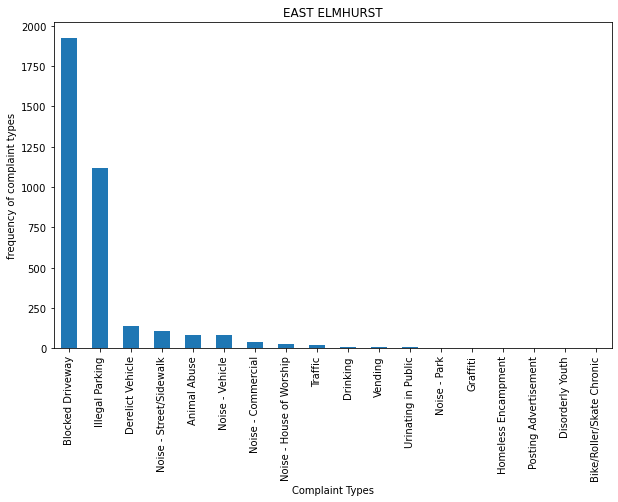



Type of complaints and their count in the city: SOUTH OZONE PARK
Blocked Driveway             1202
Illegal Parking               602
Derelict Vehicle              425
Noise - Street/Sidewalk       108
Noise - Vehicle                97
Noise - Commercial             82
Animal Abuse                   74
Traffic                        36
Drinking                       14
Noise - House of Worship        5
Homeless Encampment             5
Vending                         5
Noise - Park                    4
Disorderly Youth                2
Urinating in Public             2
Graffiti                        2
Bike/Roller/Skate Chronic       1
Illegal Fireworks               1
Posting Advertisement           1
Name: Complaint Type, dtype: int64


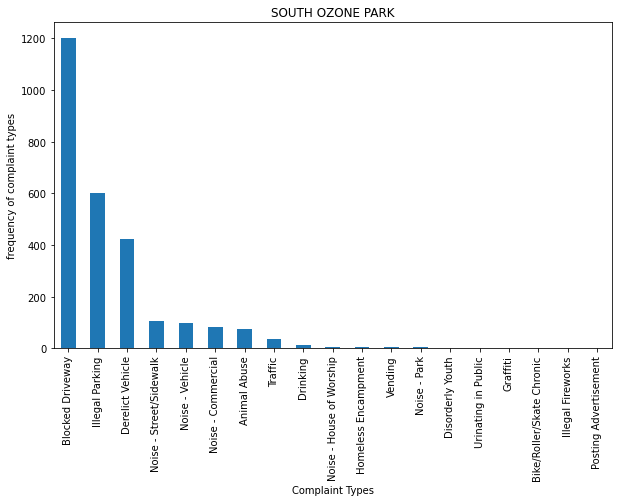



Type of complaints and their count in the city: WOODSIDE
Blocked Driveway             2065
Illegal Parking              1205
Derelict Vehicle              306
Noise - Street/Sidewalk       266
Noise - Commercial            258
Noise - Vehicle               136
Animal Abuse                  111
Traffic                        45
Homeless Encampment            38
Noise - Park                   37
Drinking                       15
Vending                        15
Urinating in Public             8
Bike/Roller/Skate Chronic       5
Graffiti                        4
Noise - House of Worship        4
Illegal Fireworks               1
Disorderly Youth                1
Name: Complaint Type, dtype: int64


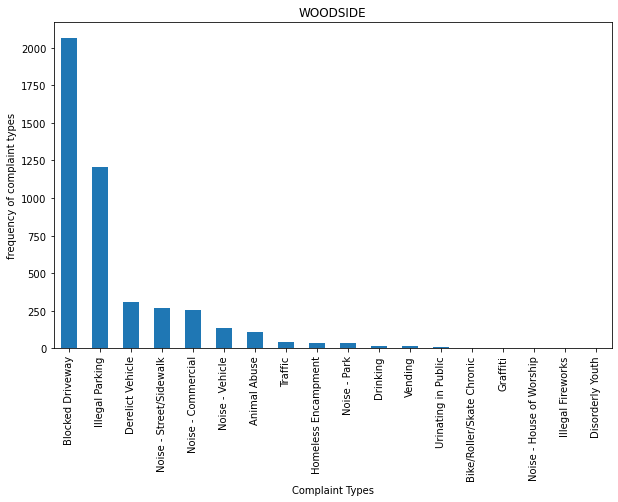



Type of complaints and their count in the city: FRESH MEADOWS
Illegal Parking            1155
Blocked Driveway            682
Derelict Vehicle            346
Noise - Vehicle              97
Animal Abuse                 66
Noise - Street/Sidewalk      48
Noise - Commercial           21
Traffic                      15
Noise - Park                  8
Homeless Encampment           6
Drinking                      2
Urinating in Public           1
Panhandling                   1
Vending                       1
Name: Complaint Type, dtype: int64


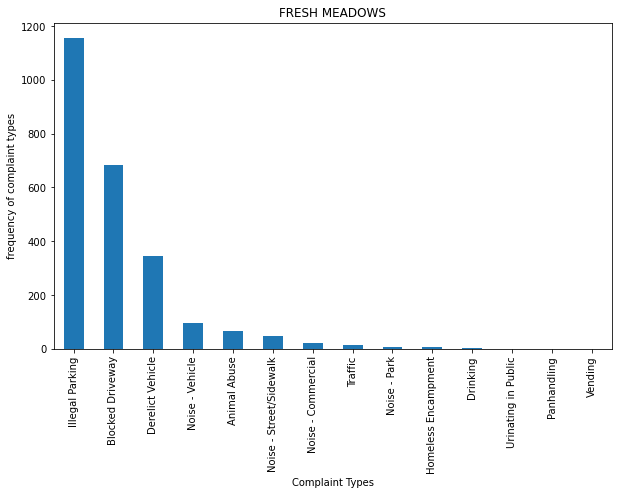



Type of complaints and their count in the city: LONG ISLAND CITY
Blocked Driveway             1107
Illegal Parking              1048
Noise - Commercial            288
Derelict Vehicle              223
Noise - Street/Sidewalk       161
Noise - Vehicle               120
Traffic                        83
Noise - Park                   55
Animal Abuse                   40
Vending                        31
Homeless Encampment            10
Drinking                        8
Urinating in Public             3
Graffiti                        3
Bike/Roller/Skate Chronic       3
Posting Advertisement           2
Panhandling                     2
Disorderly Youth                2
Name: Complaint Type, dtype: int64


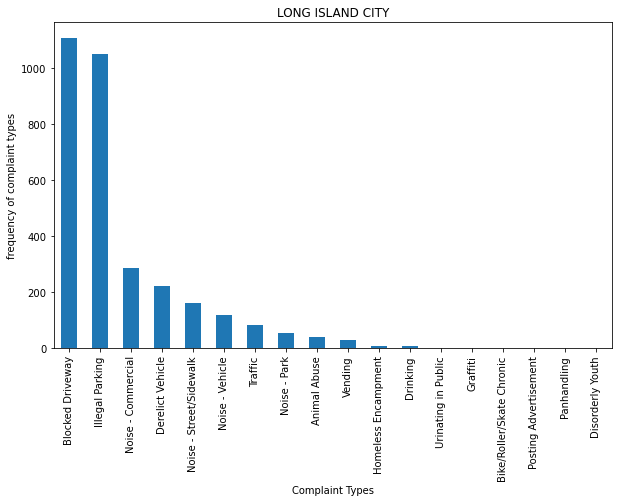



Type of complaints and their count in the city: ROCKAWAY PARK
Illegal Parking            336
Noise - Street/Sidewalk    217
Blocked Driveway            80
Noise - Commercial          72
Animal Abuse                33
Noise - Vehicle             29
Drinking                    23
Derelict Vehicle            19
Traffic                      7
Homeless Encampment          4
Disorderly Youth             4
Vending                      2
Noise - Park                 2
Urinating in Public          1
Name: Complaint Type, dtype: int64


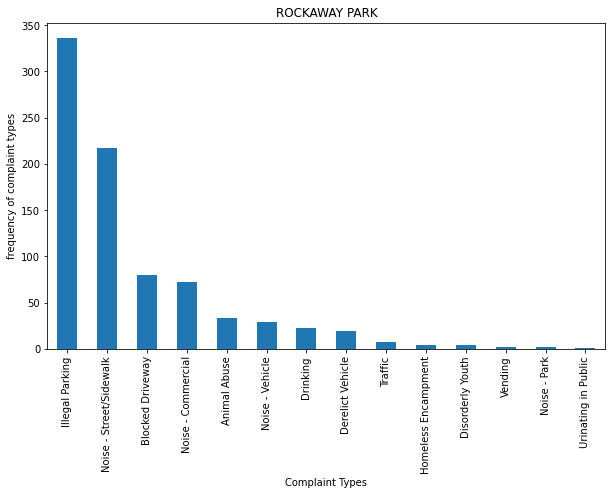



Type of complaints and their count in the city: SPRINGFIELD GARDENS
Blocked Driveway            330
Illegal Parking             291
Derelict Vehicle            267
Noise - Vehicle              48
Animal Abuse                 42
Noise - Street/Sidewalk      42
Noise - Commercial           38
Traffic                      12
Homeless Encampment           7
Drinking                      6
Urinating in Public           3
Panhandling                   2
Posting Advertisement         2
Noise - Park                  1
Noise - House of Worship      1
Vending                       1
Illegal Fireworks             1
Name: Complaint Type, dtype: int64


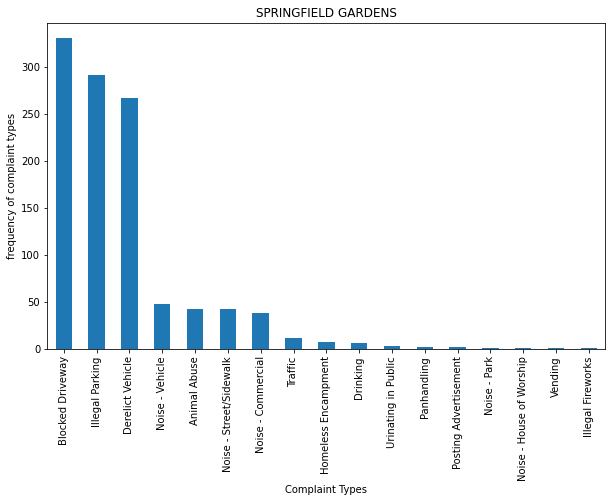



Type of complaints and their count in the city: COLLEGE POINT
Blocked Driveway            597
Illegal Parking             449
Derelict Vehicle            223
Noise - Vehicle             140
Noise - Commercial           38
Animal Abuse                 35
Noise - Street/Sidewalk      34
Traffic                      16
Homeless Encampment           3
Noise - Park                  2
Graffiti                      2
Noise - House of Worship      2
Vending                       1
Disorderly Youth              1
Drinking                      1
Name: Complaint Type, dtype: int64


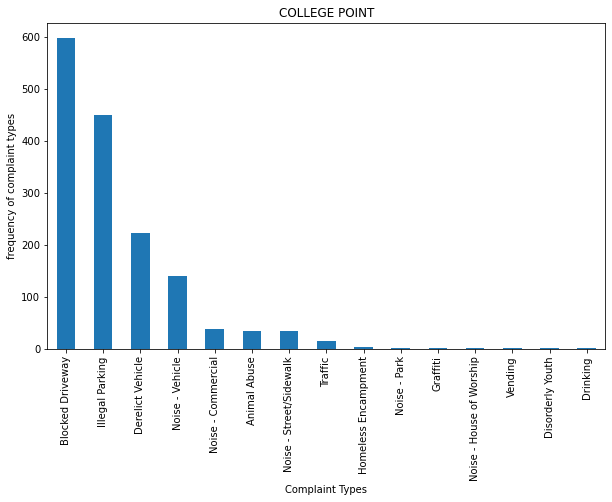



Type of complaints and their count in the city: BAYSIDE
Illegal Parking             637
Blocked Driveway            514
Derelict Vehicle            231
Animal Abuse                 53
Noise - Commercial           47
Noise - Vehicle              24
Noise - Street/Sidewalk      17
Traffic                       9
Graffiti                      3
Noise - Park                  3
Noise - House of Worship      3
Homeless Encampment           2
Disorderly Youth              2
Vending                       2
Drinking                      1
Name: Complaint Type, dtype: int64


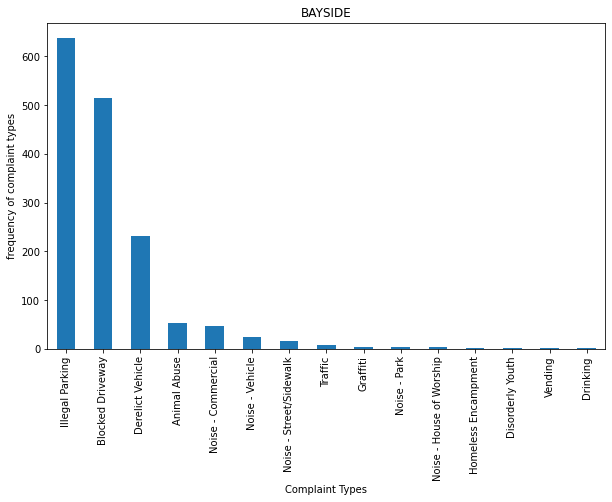



Type of complaints and their count in the city: GLEN OAKS
Illegal Parking            95
Noise - Commercial         84
Derelict Vehicle           57
Blocked Driveway           48
Noise - Park               38
Vending                    19
Noise - Street/Sidewalk     6
Animal Abuse                5
Noise - Vehicle             4
Traffic                     3
Urinating in Public         2
Name: Complaint Type, dtype: int64


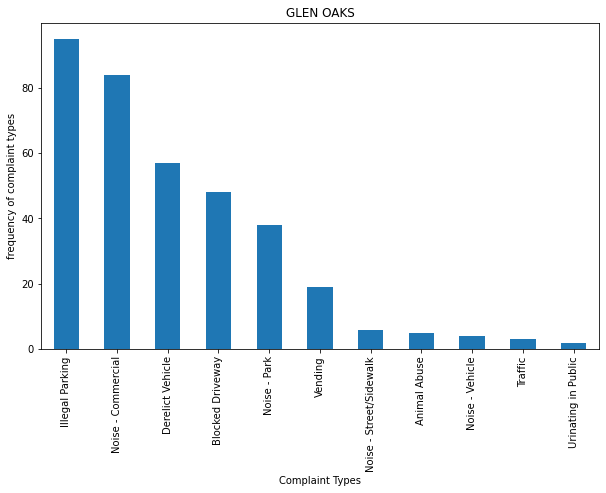



Type of complaints and their count in the city: FAR ROCKAWAY
Blocked Driveway            383
Illegal Parking             339
Derelict Vehicle            215
Noise - Street/Sidewalk     140
Animal Abuse                111
Noise - Vehicle              83
Noise - Commercial           59
Noise - Park                 23
Homeless Encampment          16
Traffic                      10
Vending                      10
Drinking                      4
Noise - House of Worship      1
Disorderly Youth              1
Urinating in Public           1
Name: Complaint Type, dtype: int64


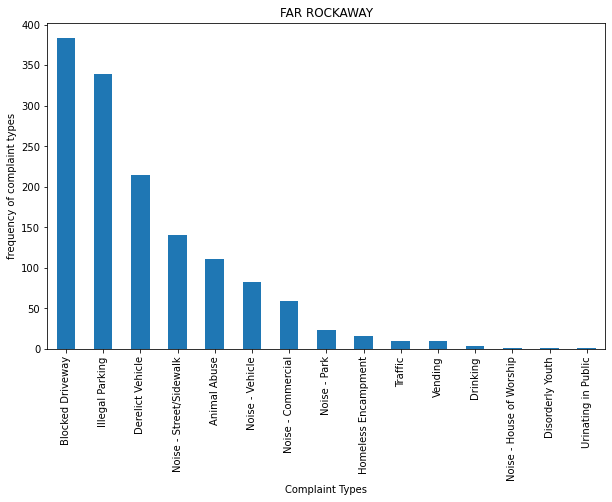



Type of complaints and their count in the city: BELLEROSE
Blocked Driveway             138
Illegal Parking              132
Derelict Vehicle             120
Noise - Commercial            38
Animal Abuse                  15
Noise - Street/Sidewalk       13
Noise - Vehicle               11
Traffic                        9
Disorderly Youth               2
Homeless Encampment            1
Urinating in Public            1
Bike/Roller/Skate Chronic      1
Panhandling                    1
Noise - Park                   1
Illegal Fireworks              1
Noise - House of Worship       1
Posting Advertisement          1
Drinking                       1
Name: Complaint Type, dtype: int64


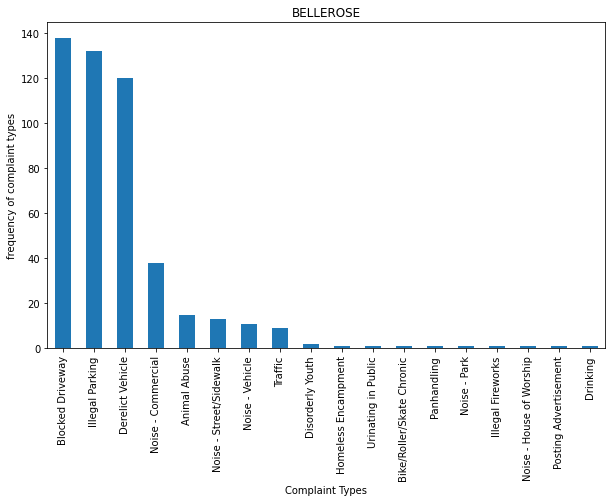



Type of complaints and their count in the city: LITTLE NECK
Illegal Parking            322
Blocked Driveway           174
Noise - Commercial          77
Derelict Vehicle            73
Animal Abuse                21
Traffic                     20
Noise - Street/Sidewalk     10
Noise - Vehicle              8
Noise - Park                 2
Disorderly Youth             2
Urinating in Public          1
Drinking                     1
Posting Advertisement        1
Name: Complaint Type, dtype: int64


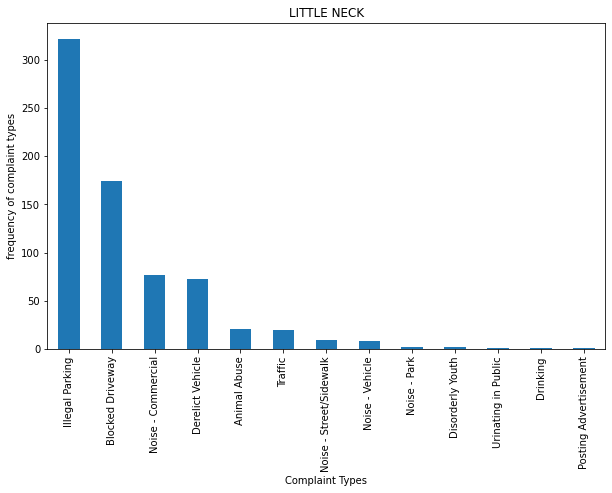



Type of complaints and their count in the city: CAMBRIA HEIGHTS
Blocked Driveway            177
Derelict Vehicle            148
Illegal Parking             113
Noise - Vehicle             100
Noise - Street/Sidewalk      29
Noise - Commercial           19
Animal Abuse                 15
Traffic                       7
Homeless Encampment           6
Noise - House of Worship      2
Illegal Fireworks             1
Name: Complaint Type, dtype: int64


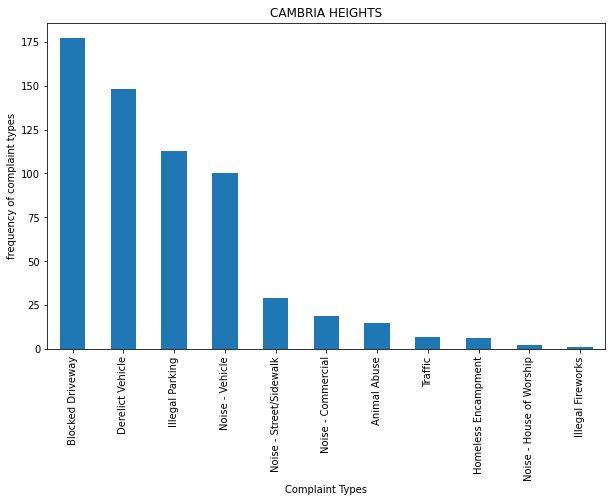



Type of complaints and their count in the city: ROSEDALE
Illegal Parking              324
Blocked Driveway             270
Derelict Vehicle             247
Noise - Park                  69
Animal Abuse                  44
Noise - Commercial            28
Traffic                       25
Noise - Street/Sidewalk       25
Noise - Vehicle               24
Vending                       19
Homeless Encampment            4
Drinking                       2
Graffiti                       2
Noise - House of Worship       2
Bike/Roller/Skate Chronic      1
Name: Complaint Type, dtype: int64


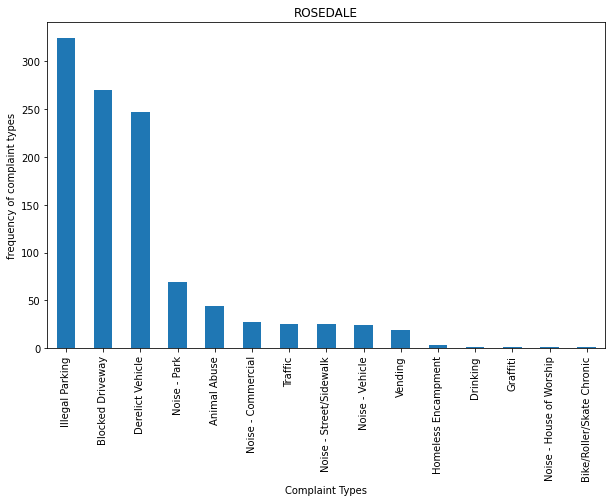



Type of complaints and their count in the city: SUNNYSIDE
Blocked Driveway             278
Noise - Commercial           238
Illegal Parking              167
Noise - Street/Sidewalk       69
Noise - Vehicle               53
Animal Abuse                  40
Derelict Vehicle              17
Traffic                       17
Noise - Park                  16
Vending                       15
Drinking                      12
Homeless Encampment           12
Posting Advertisement          3
Bike/Roller/Skate Chronic      2
Urinating in Public            2
Disorderly Youth               2
Graffiti                       1
Name: Complaint Type, dtype: int64


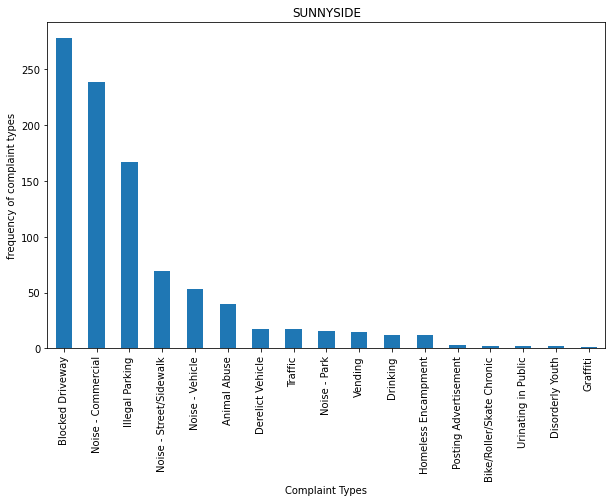



Type of complaints and their count in the city: WHITESTONE
Illegal Parking              630
Blocked Driveway             279
Derelict Vehicle             279
Animal Abuse                  43
Noise - Street/Sidewalk       34
Traffic                       32
Noise - Vehicle               31
Noise - Commercial            21
Noise - Park                   7
Bike/Roller/Skate Chronic      4
Drinking                       3
Illegal Fireworks              1
Disorderly Youth               1
Graffiti                       1
Vending                        1
Name: Complaint Type, dtype: int64


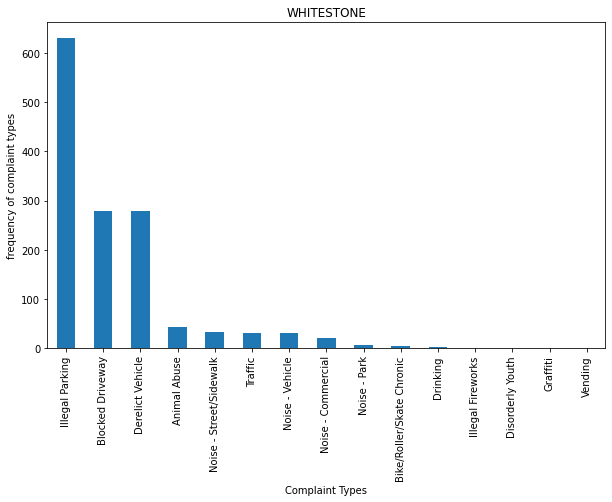



Type of complaints and their count in the city: ARVERNE
Illegal Parking             62
Blocked Driveway            50
Animal Abuse                46
Derelict Vehicle            32
Noise - Street/Sidewalk     29
Noise - House of Worship    14
Noise - Vehicle              9
Homeless Encampment          4
Noise - Commercial           2
Disorderly Youth             2
Noise - Park                 2
Urinating in Public          1
Panhandling                  1
Vending                      1
Drinking                     1
Graffiti                     1
Traffic                      1
Name: Complaint Type, dtype: int64


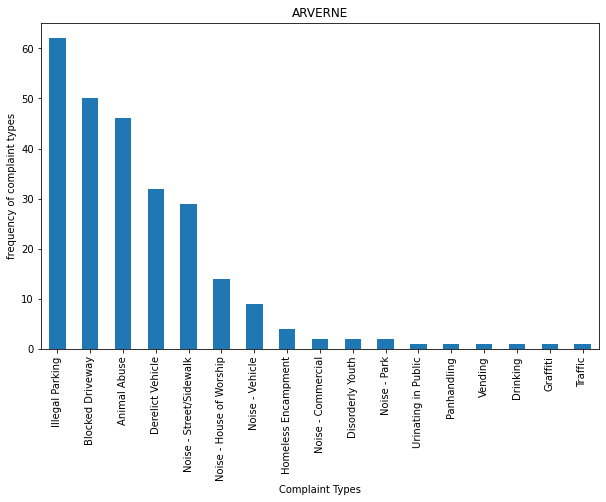



Type of complaints and their count in the city: FLORAL PARK
Derelict Vehicle           74
Illegal Parking            72
Blocked Driveway           33
Animal Abuse                7
Noise - Commercial          3
Noise - Street/Sidewalk     3
Noise - Vehicle             2
Drinking                    1
Disorderly Youth            1
Name: Complaint Type, dtype: int64


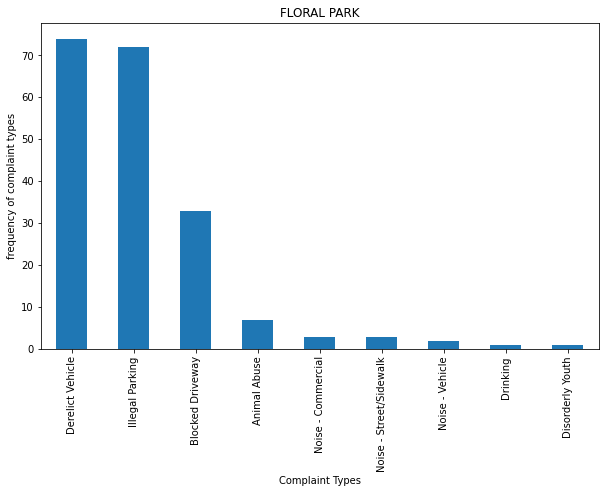



Type of complaints and their count in the city: NEW HYDE PARK
Blocked Driveway      76
Illegal Parking       32
Derelict Vehicle      14
Noise - Commercial     4
Noise - Vehicle        2
Animal Abuse           1
Name: Complaint Type, dtype: int64


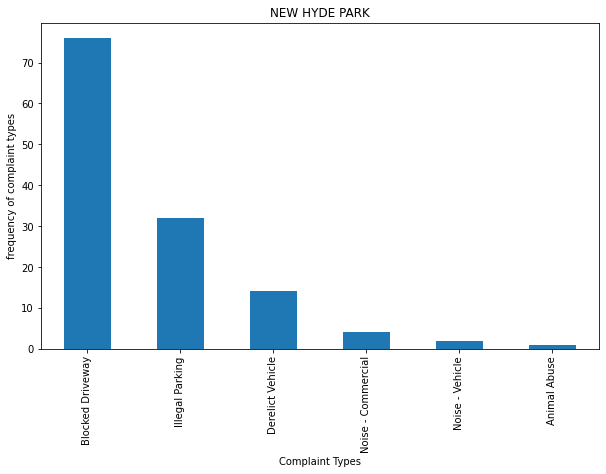



Type of complaints and their count in the city: CENTRAL PARK
Noise - Street/Sidewalk    105
Illegal Parking              5
Name: Complaint Type, dtype: int64


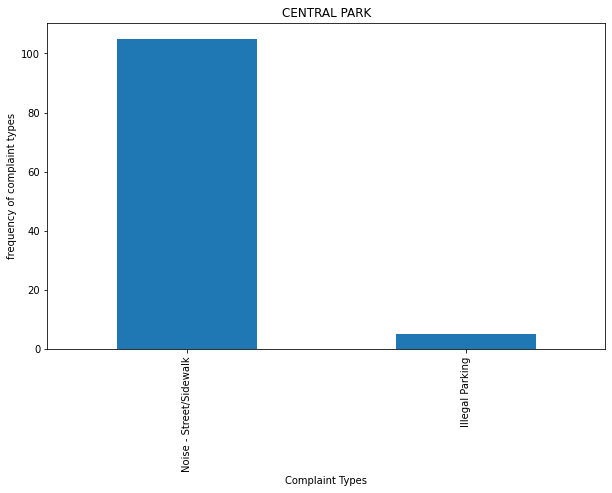



Type of complaints and their count in the city: BREEZY POINT
Illegal Parking            16
Noise - Commercial          4
Blocked Driveway            3
Derelict Vehicle            3
Animal Abuse                2
Noise - Street/Sidewalk     1
Noise - Vehicle             1
Drinking                    1
Name: Complaint Type, dtype: int64


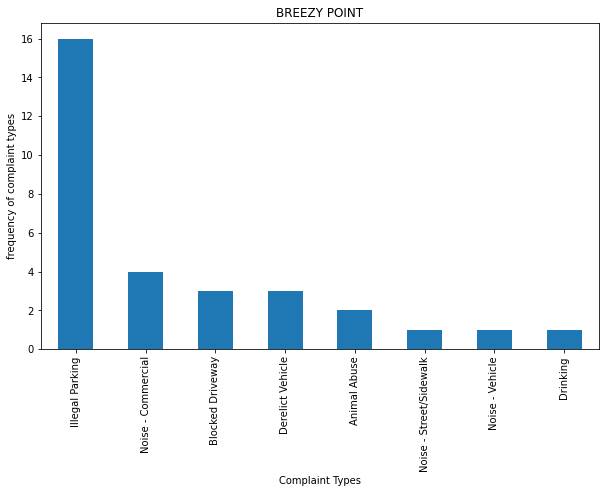



Type of complaints and their count in the city: QUEENS
Illegal Parking             10
Noise - Commercial           6
Noise - Street/Sidewalk      6
Blocked Driveway             3
Derelict Vehicle             2
Traffic                      2
Homeless Encampment          2
Noise - Vehicle              2
Noise - House of Worship     1
Urinating in Public          1
Animal Abuse                 1
Name: Complaint Type, dtype: int64


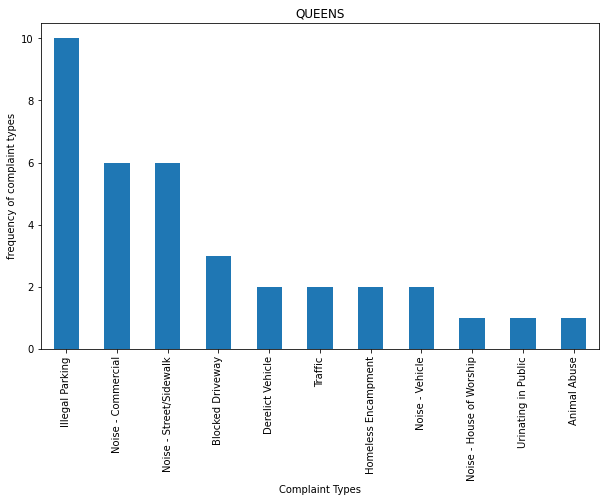

In [33]:
# creating a for loop to store data into city_data dict and visualize each city complaints
for x in city_list:
  print('Type of complaints and their count in the city:', x)
  city_data[x] = data[(data['City'])== x ]['Complaint Type'].value_counts()
  print(city_data[x])
  plt.figure(figsize = (10,6))
  data[(data['City'])== x ]['Complaint Type'].value_counts().plot(kind = 'bar')
  plt.xlabel('Complaint Types')
  plt.ylabel('frequency of complaint types')
  plt.title(x)
  plt.show()
  print('\n')

### 5.the average response time across various types of complaints

In [34]:
# fetching different type of complaints and making list of it
complaint_types = data['Complaint Type'].unique()

In [35]:
complaint_types

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Squeegee'],
      dtype=object)

In [36]:
#Creating a dict to store avg response time of each type of complaint
avg_response_time = {}

In [37]:

for x in complaint_types:
  avg_response_time[x] = (data[(data['Complaint Type'] == x)]['Closed Date'] - data[(data['Complaint Type'] == x)]['Created Date']).mean()


In [38]:
avg_response_time

{'Noise - Street/Sidewalk': Timedelta('0 days 03:23:38.634311023'),
 'Blocked Driveway': Timedelta('0 days 04:30:17.743133781'),
 'Illegal Parking': Timedelta('0 days 04:19:44.270638475'),
 'Derelict Vehicle': Timedelta('0 days 07:01:20.382228030'),
 'Noise - Commercial': Timedelta('0 days 03:04:01.751105915'),
 'Noise - House of Worship': Timedelta('0 days 03:09:58.348727615'),
 'Posting Advertisement': Timedelta('0 days 02:01:25.103092783'),
 'Noise - Vehicle': Timedelta('0 days 03:29:46.473882352'),
 'Animal Abuse': Timedelta('0 days 05:00:51.121679520'),
 'Vending': Timedelta('0 days 03:59:14.567243035'),
 'Traffic': Timedelta('0 days 03:25:15.018579446'),
 'Drinking': Timedelta('0 days 03:50:03.062857142'),
 'Bike/Roller/Skate Chronic': Timedelta('0 days 03:35:41.935205183'),
 'Panhandling': Timedelta('0 days 04:23:42.390625'),
 'Noise - Park': Timedelta('0 days 03:23:22.648060075'),
 'Homeless Encampment': Timedelta('0 days 04:17:55.948643611'),
 'Urinating in Public': Timedelta(

In [39]:
df_avg_response_time = pd.DataFrame(avg_response_time, index = ['Avg response time'])

In [40]:
df_avg_response_time

,Noise - Street/Sidewalk,Blocked Driveway,Illegal Parking,Derelict Vehicle,Noise - Commercial,Noise - House of Worship,Posting Advertisement,Noise - Vehicle,Animal Abuse,Vending,...,Drinking,Bike/Roller/Skate Chronic,Panhandling,Noise - Park,Homeless Encampment,Urinating in Public,Graffiti,Disorderly Youth,Illegal Fireworks,Squeegee
Avg response time,0 days 03:23:38.634311023,0 days 04:30:17.743133781,0 days 04:19:44.270638475,0 days 07:01:20.382228030,0 days 03:04:01.751105915,0 days 03:09:58.348727615,0 days 02:01:25.103092783,0 days 03:29:46.473882352,0 days 05:00:51.121679520,0 days 03:59:14.567243035,...,0 days 03:50:03.062857142,0 days 03:35:41.935205183,0 days 04:23:42.390625,0 days 03:23:22.648060075,0 days 04:17:55.948643611,0 days 03:35:58.723868954,0 days 06:27:55.515923566,0 days 03:26:35.308917197,0 days 02:48:41.113772455,0 days 04:02:44.250000


In [41]:
df_avg_response_time.shape

(1, 21)

In [42]:
#transposing the df_avg_response_time dataframe 
df_avg_response_time = df_avg_response_time.T

In [43]:
df_avg_response_time

,Avg response time
Noise - Street/Sidewalk,0 days 03:23:38.634311023
Blocked Driveway,0 days 04:30:17.743133781
Illegal Parking,0 days 04:19:44.270638475
Derelict Vehicle,0 days 07:01:20.382228030
Noise - Commercial,0 days 03:04:01.751105915
Noise - House of Worship,0 days 03:09:58.348727615
Posting Advertisement,0 days 02:01:25.103092783
Noise - Vehicle,0 days 03:29:46.473882352
Animal Abuse,0 days 05:00:51.121679520
Vending,0 days 03:59:14.567243035
